Task 1
======

Naive Bayes API: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Naive Bayes theory: https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

In [3]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [4]:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(twenty_train.data)
print(X_train.shape)

y_train = twenty_train.target
print(y_train.shape)

(11314, 130107)
(11314,)


In [5]:
clf = MultinomialNB(alpha = 0.01)
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [6]:
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
X_test = tfidf_vectorizer.transform(twenty_test.data)
print(X_test.shape)

y_test_expected = twenty_test.target
print(y_test_expected.shape)

(7532, 130107)
(7532,)


In [7]:
y_test_predicted = clf.predict(X_test)

print("accuracy: ", np.sum(y_test_predicted == y_test_expected) / len(y_test_predicted))

accuracy:  0.8352363250132767


data size: 226 accuracy:  0.40613382899628253
data size: 452 accuracy:  0.5234997344662772
data size: 678 accuracy:  0.5982474774296336
data size: 905 accuracy:  0.6461763143919278
data size: 1131 accuracy:  0.6775092936802974
data size: 1357 accuracy:  0.700477960701009
data size: 1583 accuracy:  0.7193308550185874
data size: 1810 accuracy:  0.7286245353159851
data size: 2036 accuracy:  0.7322092405735529
data size: 2262 accuracy:  0.7434944237918215
data size: 2489 accuracy:  0.748672331386086
data size: 2715 accuracy:  0.7562400424853957
data size: 2941 accuracy:  0.7614179500796601
data size: 3167 accuracy:  0.7720392989909719
data size: 3394 accuracy:  0.7738980350504514
data size: 3620 accuracy:  0.7760223048327137
data size: 3846 accuracy:  0.7812002124269782
data size: 4073 accuracy:  0.786510886882634
data size: 4299 accuracy:  0.789166224110462
data size: 4525 accuracy:  0.7910249601699416
data size: 4751 accuracy:  0.7950079660116834
data size: 4978 accuracy:  0.797928836962

Text(0, 0.5, 'prediction accuracy for const testing data')

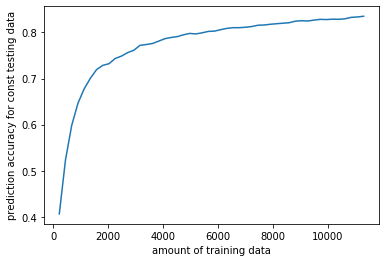

In [8]:

step = 2
percentages = range(step, 100 + step, step)

accuracies = list()
train_amount = list()

for percentage in percentages:
    train_index = (X_train.shape[0] * percentage) // 100
    
    X_train_loop = X_train[:train_index, :]
    y_train_loop = y_train[:train_index]
    
    X_test_loop = X_test
    y_test_expected_loop = y_test_expected

    clf = MultinomialNB(alpha = 0.01)
    clf = clf.fit(X_train_loop, y_train_loop)

    y_test_predicted_loop = clf.predict(X_test_loop)

    accuracy = np.sum(y_test_predicted_loop == y_test_expected_loop) / len(y_test_predicted_loop)
    print("data size:", train_index, "accuracy: ", accuracy)

    train_amount.append(train_index)
    accuracies.append(accuracy)

plt.plot(train_amount, accuracies)
plt.xlabel("amount of training data")
plt.ylabel("prediction accuracy for const testing data")
